In [7]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score


#avoid warning messages
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis (EDA)

***Australian Rainy Weather Prediction
 Dataset:***

*   **Date**

*   **Location:**	49 different locations has been considered.

*   **MinTemp:** Minimum temp in degree celcius

*   **MaxTemp:** Maximum temp in degree celcius

*   **Rainfall:**	The amount of rainfall recorded for the day in mm.

*   **Evaporation:**	Evaporation(mm) in 24hours


*   **Sunshine:**	number of hours of bright sunshine.

*   **WindGustDir:**	The direction of the strongest wind gust in the 24 hours to midnight

*   **WindGustSpeed:**	The speed (km/h) of the strongest wind gust in the 24 hours to midnight

*   **WindDir9am, WindDir3pm:**	Direction of wind at 9am and 3pm

*   **WindSpeed9am, WindSpeed3pm:** Speed of wind at 9am and 3pm

*   **Humidity9am, Humidity3pm:** Humidity at 9am and 3pm
*   **Pressure9am, Pressure3pm:** Atmospheric pressure at 9am and 3pm

*   **Cloud9am, Cloud3pm:** Fraction of sky obscured by cloud at 9am

*   **Temp9am, Temp3pm:** Temperature at 9am and 3pm

*   **RainToday:**
         1 = rained today
         0 = didn't rain today
*   **RainTomorrow [Target column]:**          
         
         1 = Will be raining tomorrow
         0 = won't be raining tomorrow





In [8]:
# read dataset from a public Google Drive File


df = pd.read_csv('/content/classwork dataset.csv')

# let's look at the first few instances
df.head(5)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0


In [9]:
df.shape

(77116, 23)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77116 entries, 0 to 77115
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           77116 non-null  object 
 1   Location       77116 non-null  object 
 2   MinTemp        76003 non-null  float64
 3   MaxTemp        76178 non-null  float64
 4   Rainfall       74882 non-null  float64
 5   Evaporation    38277 non-null  float64
 6   Sunshine       31457 non-null  float64
 7   WindGustDir    70980 non-null  object 
 8   WindGustSpeed  70988 non-null  float64
 9   WindDir9am     70173 non-null  object 
 10  WindDir3pm     74312 non-null  object 
 11  WindSpeed9am   75736 non-null  float64
 12  WindSpeed3pm   75122 non-null  float64
 13  Humidity9am    75296 non-null  float64
 14  Humidity3pm    74868 non-null  float64
 15  Pressure9am    66527 non-null  float64
 16  Pressure3pm    66580 non-null  float64
 17  Cloud9am       46797 non-null  float64
 18  Cloud3

In [11]:
df.describe(include='all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,77116,77116,76003.000000,76178.000000,74882.000000,38277.000000,31457.000000,70980,70988.000000,70173,...,75296.000000,74868.000000,66527.000000,66580.000000,46797.000000,45806.000000,75635.000000,75153.000000,74881,77115.000000
unique,3436,26,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,6/8/2014,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN
freq,26,3436,NaN,NaN,NaN,NaN,NaN,6150,NaN,6703,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58195,NaN
mean,NaN,NaN,11.245969,22.201507,2.364496,5.165789,7.295584,NaN,40.282865,NaN,...,71.255312,52.390794,1018.240173,1015.891611,4.651367,4.726935,15.772051,20.750232,NaN,0.245335
std,NaN,NaN,6.201181,6.932712,8.267885,4.128318,3.845071,NaN,14.407020,NaN,...,17.830648,20.734450,7.119901,6.993529,2.906972,2.693751,6.033873,6.740433,NaN,0.430288
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,7.000000,NaN,...,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,-7.200000,-5.400000,NaN,0.000000
25%,NaN,NaN,6.800000,17.400000,0.000000,2.400000,4.400000,NaN,30.000000,NaN,...,59.000000,37.000000,1013.500000,1011.200000,1.000000,2.000000,11.500000,16.200000,NaN,0.000000
50%,NaN,NaN,11.300000,21.700000,0.000000,4.200000,8.100000,NaN,39.000000,NaN,...,72.000000,52.000000,1018.300000,1016.000000,6.000000,5.000000,15.900000,20.300000,NaN,0.000000
75%,NaN,NaN,16.100000,26.600000,0.600000,7.000000,10.300000,NaN,48.000000,NaN,...,85.000000,67.000000,1023.000000,1020.600000,7.000000,7.000000,20.300000,24.900000,NaN,0.000000


In [12]:
df.nunique()

,0
Date,3436
Location,26
MinTemp,375
MaxTemp,500
Rainfall,546
Evaporation,290
Sunshine,144
WindGustDir,16
WindGustSpeed,64
WindDir9am,16


In [13]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1113
MaxTemp,938
Rainfall,2234
Evaporation,38839
Sunshine,45659
WindGustDir,6136
WindGustSpeed,6128
WindDir9am,6943


In [14]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Numerical Variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']


RainTomorrow
0.0    58196
1.0    18919
Name: count, dtype: int64


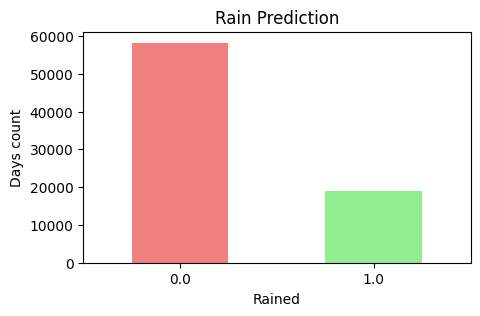

In [15]:
# Visualize the distribution of the 'RainTomorrow' variable

print(df.value_counts('RainTomorrow'))

plt.figure(figsize=(5, 3))
df['RainTomorrow'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Rain Prediction')
plt.xlabel('Rained')
plt.ylabel('Days count')
plt.xticks(rotation = 0)
plt.show()

<Figure size 800x600 with 0 Axes>

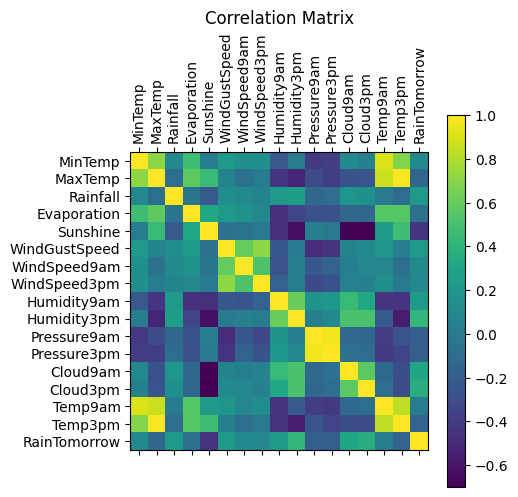

In [16]:
# Correlation matrix plot
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr(numeric_only=True)
# print(correlation_matrix)
plt.matshow(correlation_matrix)
plt.title('Correlation Matrix')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

# Data Prepocessing

In [17]:
#drop redundant feature(s)
df = df.drop(['Date'], axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77111,Portland,10.0,19.3,0.0,7.2,11.0,SSE,37.0,SSE,SSE,...,67.0,57.0,1019.3,1017.5,5.0,2.0,16.0,17.8,No,0.0
77112,Portland,14.3,18.1,0.0,5.8,6.6,SSE,44.0,SSE,S,...,68.0,68.0,1015.6,1016.5,6.0,8.0,15.7,15.5,No,0.0
77113,Portland,12.5,16.7,0.0,3.4,5.0,SSE,37.0,SSE,S,...,82.0,75.0,1016.9,1018.1,8.0,8.0,13.6,14.2,No,0.0
77114,Portland,12.0,17.6,0.4,5.0,4.7,SSE,39.0,SSE,S,...,71.0,67.0,1022.4,1023.8,8.0,7.0,14.2,16.6,No,0.0


In [18]:
#drop duplicates
df = df.drop_duplicates()
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77111,Portland,10.0,19.3,0.0,7.2,11.0,SSE,37.0,SSE,SSE,...,67.0,57.0,1019.3,1017.5,5.0,2.0,16.0,17.8,No,0.0
77112,Portland,14.3,18.1,0.0,5.8,6.6,SSE,44.0,SSE,S,...,68.0,68.0,1015.6,1016.5,6.0,8.0,15.7,15.5,No,0.0
77113,Portland,12.5,16.7,0.0,3.4,5.0,SSE,37.0,SSE,S,...,82.0,75.0,1016.9,1018.1,8.0,8.0,13.6,14.2,No,0.0
77114,Portland,12.0,17.6,0.4,5.0,4.7,SSE,39.0,SSE,S,...,71.0,67.0,1022.4,1023.8,8.0,7.0,14.2,16.6,No,0.0


In [19]:
# Drop rows with missing values
df.dropna(subset=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77110,Portland,11.1,20.7,0.0,6.8,13.8,SE,46.0,SE,SE,...,74.0,59.0,1022.3,1021.0,8.0,1.0,16.0,19.3,No,0.0
77111,Portland,10.0,19.3,0.0,7.2,11.0,SSE,37.0,SSE,SSE,...,67.0,57.0,1019.3,1017.5,5.0,2.0,16.0,17.8,No,0.0
77112,Portland,14.3,18.1,0.0,5.8,6.6,SSE,44.0,SSE,S,...,68.0,68.0,1015.6,1016.5,6.0,8.0,15.7,15.5,No,0.0
77113,Portland,12.5,16.7,0.0,3.4,5.0,SSE,37.0,SSE,S,...,82.0,75.0,1016.9,1018.1,8.0,8.0,13.6,14.2,No,0.0


In [20]:
# Fill missing values in numerical features with column's mean value
columns_to_fill = [
    'WindSpeed9am', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
    'Sunshine', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'
]
df[columns_to_fill] = df[columns_to_fill].fillna(df[columns_to_fill].mean())
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,5.240535,7.360342,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.000000,4.744719,16.9,21.8,No,0.0
1,Albury,7.4,25.1,0.0,5.240535,7.360342,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,4.669278,4.744719,17.2,24.3,No,0.0
2,Albury,12.9,25.7,0.0,5.240535,7.360342,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,4.669278,2.000000,21.0,23.2,No,0.0
3,Albury,9.2,28.0,0.0,5.240535,7.360342,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,4.669278,4.744719,18.1,26.5,No,0.0
4,Albury,17.5,32.3,1.0,5.240535,7.360342,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77110,Portland,11.1,20.7,0.0,6.800000,13.800000,SE,46.0,SE,SE,...,74.0,59.0,1022.3,1021.0,8.000000,1.000000,16.0,19.3,No,0.0
77111,Portland,10.0,19.3,0.0,7.200000,11.000000,SSE,37.0,SSE,SSE,...,67.0,57.0,1019.3,1017.5,5.000000,2.000000,16.0,17.8,No,0.0
77112,Portland,14.3,18.1,0.0,5.800000,6.600000,SSE,44.0,SSE,S,...,68.0,68.0,1015.6,1016.5,6.000000,8.000000,15.7,15.5,No,0.0
77113,Portland,12.5,16.7,0.0,3.400000,5.000000,SSE,37.0,SSE,S,...,82.0,75.0,1016.9,1018.1,8.000000,8.000000,13.6,14.2,No,0.0


In [21]:
df.shape

(64331, 22)

In [22]:
#check for total null value for each feature
df.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [23]:
#check for categorical and numerical variables in df
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']
Numerical Variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']


In [24]:
#converting categorical variables to numerical
df = pd.get_dummies(df, columns=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])
df.isnull().sum()
df.shape

(64331, 92)

In [25]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes
0,13.4,22.9,0.6,5.240535,7.360342,44.0,20.0,24.0,71.0,22.0,...,False,False,False,False,False,False,True,False,True,False
1,7.4,25.1,0.0,5.240535,7.360342,44.0,4.0,22.0,44.0,25.0,...,False,False,False,False,False,False,False,True,True,False
2,12.9,25.7,0.0,5.240535,7.360342,46.0,19.0,26.0,38.0,30.0,...,False,False,False,False,False,False,False,True,True,False
3,9.2,28.0,0.0,5.240535,7.360342,24.0,11.0,9.0,45.0,16.0,...,False,False,False,False,False,False,False,False,True,False
4,17.5,32.3,1.0,5.240535,7.360342,41.0,7.0,20.0,82.0,33.0,...,False,False,False,False,False,False,False,False,True,False


In [26]:
df.shape

(64331, 92)

# Implementing AdaBoost using Scikit-learn Library



sklearn AdaBoost reference: https://scikit-learn.org/dev/modules/generated/sklearn.ensemble.AdaBoostClassifier.html


In [27]:
# Split the data into 80-20 train-test split (you can do other ratios as well)
X = df.drop(['RainTomorrow'], axis=1)
# df['RainTomorrow']= df['RainTomorrow'].replace(0, -1)
y = df['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# display the shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (51464, 91)
X_test shape: (12867, 91)
y_train shape: (51464,)
y_test shape: (12867,)


In [29]:
abc = AdaBoostClassifier(n_estimators=5,learning_rate=1, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.820
Accuracy score (validation): 0.821


In [30]:
abc = AdaBoostClassifier(n_estimators=100,learning_rate=0.5, random_state = 42)
model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy score (training): {0:.3f}".format(model.score(X_train, y_train)))
print("Accuracy score (validation): {0:.3f}".format(model.score(X_test, y_test)))

Accuracy score (training): 0.834
Accuracy score (validation): 0.834


# Homework
# Implementing Adaboost from Scratch
##Steps:
### 1. Assign Weights to the Dataset
- Start by giving **equal weight** to every sample:  
  $w_i = \frac{1}{N} \quad \text{for } i = 1, 2, ..., N$

### 2. Create Stumps (Weak Learners)
- Use **Decision Stumps**, i.e., Decision Trees with `max_depth = 1`.
- Use **Gini Index** to find the best split at each step.

### 3. For Each Iteration (Round of Boosting)

#### a. **Train the Weak Learner**
- Fit a stump on the training data using the current sample weights.

#### b. **Predict and Compute Error**
- Calculate the weighted classification error:
  $$
  \text{error}_t = \sum_{i=1}^{N} w_i \cdot \mathbb(h_t(x_i) \ne y_i)
  $$
  Here,
  
  $w_i$ is the weight of instance $i$
  
  $h_t(x_i)$ is the prediction of weak classifier at iteration $t$

  $y_i$ is the true label

  $(h_t(x_i) \ne y_i)$ returns 1 if the condition is true and 0 otherwise

#### c. **Compute the "Amount of Say" (Alpha)**
- This is the weight given to the weak learner:
  $$
  \alpha_t = \eta \cdot \frac{1}{2} \log\left(\frac{1 - \text{error}_t}{\text{error}_t}\right)
  $$
- Where:
  - $\eta$ is the **learning rate** (e.g., 0.1, 0.5, 1.0)

### 4. Modify the Sample Weights

- **Increase** the weights of **incorrectly classified** samples:
  $$
  w_i \leftarrow w_i \cdot e^{\alpha_t}
  $$

- **Decrease** the weights of **correctly classified** samples:
  $$
  w_i \leftarrow w_i \cdot e^{-\alpha_t}
  $$

- Combined in one expression:
  $$
  w_i \leftarrow w_i \cdot e^{\alpha_t \cdot (2 \cdot(y_i \ne h_t(x_i)) - 1)}
  $$

### 5. Normalize the Weights

Ensure the weights sum to 1:
$$
w_i \leftarrow \frac{w_i}{\sum_{j=1}^N w_j}
$$

### 6. Final Prediction (Ensemble Output)

The final prediction is a **weighted vote** of all weak learners:
$$
F(x) = \sum_{t=1}^T \alpha_t \cdot h_t(x)
$$

Classify based on the sign:
$$
\hat{y} = \text{sign}(F(x))
$$

### Notes:
- Ensure labels are in $\{-1, +1\}$ for proper calculations.

In [38]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier

class AdaBoostClassifier:
    def __init__(self, n_estimators=50, learning_rate=1.0):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.alphas = []
        self.models = []

    def fit(self, X, y):
        samp = X.shape[0]
        weig = np.full(samp, 1.0 / samp, dtype=float)
        self.alphas = []
        self.models = []
        for t in range(self.n_estimators):
            stump = DecisionTreeClassifier(max_depth=1, criterion="gini", random_state=42)
            stump.fit(X, y, sample_weight=weig)
            y_pred = stump.predict(X)
            missedvar = (y_pred != y).astype(float)
            error = np.dot(weig, missedvar)
            eps = 1e-10
            error = np.clip(error, eps, 1 - eps)
            alpha = self.learning_rate * 0.5 * np.log((1 - error) / error)
            self.models.append(stump)
            self.alphas.append(alpha)
            weig *= np.exp(-alpha * y * y_pred)
            weig_sum = np.sum(weig)
            if weig_sum == 0:
                weig = np.full(samp, 1.0 / samp, dtype=float)
            else:
                weig /= weig_sum
        return self
    def predict(self, X):
      n_samples = X.shape[0]
      final_pred = np.zeros(n_samples, dtype=float)
      for model, alpha in zip(self.models, self.alphas):
          final_pred += alpha * model.predict(X)
      y_pred = np.sign(final_pred)
      y_pred[y_pred == 0] = 1
      return y_pred.astype(int)
y_train_ab = y_train.replace({0: -1, 1: 1})
y_test_ab = y_test.replace({0: -1, 1: 1})
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1)
adaboost.fit(X_train, y_train_ab.to_numpy())
y_pred_ab = adaboost.predict(X_test)
print("AdaBoost Classifier (from scratch) Accuracy:", accuracy_score(y_test_ab, y_pred_ab))


AdaBoost Classifier (from scratch) Accuracy: 0.8330613196549312
